In [8]:
import os
import pandas as pd
import gensim
from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim as gensimvis
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



# preprocess a single tweet/text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    stop_words.add("embeddedurl")
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# evaluate the coherence for each number of topics in a range
def evaluate_coherence(corpus, dictionary, texts, num_topics_list):
    coherence_scores = []
    lda_models = []  # List to store LDA models

    for num_topics in num_topics_list:
        print(num_topics)
        # Create a new LDA model for each evaluation
        lda_model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        coherence = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
        coherence_scores.append((num_topics, coherence.get_coherence()))
        lda_models.append(lda_model)

    # Create a DataFrame to store the coherence scores
    coherence_df = pd.DataFrame(coherence_scores, columns=["Number of Topics", "Coherence Scores"])
    return coherence_df, lda_models


# # load the data and transform to DataFrame
df = pd.read_csv(".././data/full_year.csv")
# Filter tweets containing both "spirituality" and "religion"
df = df[(df['clean_text'].str.contains('spirituality', case=False)) & 
            (df['clean_text'].str.contains('religion', case=False))]
df['tokenized_text'] = df['clean_text'].apply(preprocess_text)


# create vocabulary and doc2box doc-term matrix
dictionary = Dictionary(df['tokenized_text'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['tokenized_text']]

# path to the Mallet executable
mallet_path = 'mallet-2.0.8/bin/mallet'

# run and save the model
num_topics = 10 
lda = LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary)
os.makedirs('models', exist_ok=True)
lda.save(os.path.join('models', 'lda_religion_AND_spirituality'))

# calculate coherence and save to csv
num_topics_list = list(range(2, 16, 1))
coherence_scores, lda_models = evaluate_coherence(doc_term_matrix, dictionary, df['tokenized_text'], num_topics_list)

# save all the LDA models
for i, model in enumerate(lda_models):
    model.save(os.path.join('models', f'lda_religion_AND_spirituality_{num_topics_list[i]}_topics'))

os.makedirs('coherence', exist_ok=True)
coherence_scores.to_csv(os.path.join('coherence', 'coherence_religion_AND_spirituality.csv'), index=False)

[nltk_data] Downloading package punkt to /Users/shtosti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shtosti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shtosti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.43906
<20> LL/token: -8.98274
<30> LL/token: -8.71913
<40> LL/token: -8.58009

0	5	love god spirituality spiritual alratv religion younusalgohar goharshahi divine islam sufism heart sufi allah humanity full path info master peace 
1	5	religion spirituality people rt gt good religious interfaith feel live spirit power world woman join culture author today ca group 
2	5	spirituality religion amreading bookbubble true spiritual real atheism black learn page hindu person singh buddhist rule 

2


Mallet LDA: 2 topics, 1 topic bits, 1 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -8.41528
<20> LL/token: -8.30424
<30> LL/token: -8.21647
<40> LL/token: -8.15974

0	25	religion spirituality book kindle people christianity bible jesus read african thing world culture religious amreading good bookbubble human inspiration worship 
1	25	spirituality religion god spiritual love faith life people soul peace meditation alratv younusalgohar goharshahi christian prayer wisdom islam hope religious 

<50> LL/token: -8.12952
<60> LL/token: -8.10907
<70> LL/token: -8.09209
<80> LL/token: -8.07818
<90> LL/token: -8.07022

0	25	religion spirituality book people kindle christianity bible african read thing world science belief jesus time good make amreading culture bookbubble 
1	25	religion spirituality god spiritual love faith life soul peace meditation alratv religious people younusalgohar goharshahi church prayer mind islam hope 

<100> LL/token: -8.06327
<110> LL/to

3


Mallet LDA: 3 topics, 2 topic bits, 11 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -8.70097
<20> LL/token: -8.51141
<30> LL/token: -8.37885
<40> LL/token: -8.29131

0	16.66667	religion spirituality book kindle christianity people christian religious read science amreading find belief experience ebooks make supernatural work life understand 
1	16.66667	spirituality religion people bible african jesus world thing system worship health good inspiration scripture feel belief pray thinking culture true 
2	16.66667	religion spirituality god spiritual faith love life soul peace meditation alratv younusalgohar goharshahi prayer mind wisdom hope islam divine sufism 

<50> LL/token: -8.23984
<60> LL/token: -8.19954
<70> LL/token: -8.17533
<80> LL/token: -8.15171
<90> LL/token: -8.13703

0	16.66667	religion spirituality book kindle people christianity read science christian make amreading bookbubble find truth experience organized ebooks work power supernatural 
1	1

4


Mallet LDA: 4 topics, 2 topic bits, 11 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -8.89947
<20> LL/token: -8.62644
<30> LL/token: -8.4406
<40> LL/token: -8.33678

0	12.5	religion spirituality world people thing human power make personal belief man understand good atheism difference place science hindu gt spirit 
1	12.5	spirituality religion african people culture belief religious organized rt science practice history part relationship year amreading control politics fear person 
2	12.5	god spiritual spirituality religion love faith jesus soul bible peace life meditation alratv younusalgohar pray goharshahi prayer mind islam hope 
3	12.5	spirituality religion book kindle christianity people read life find ebooks supernatural religious story christian work paranormal hell iartg truth wboonehedgepeth 

<50> LL/token: -8.2807
<60> LL/token: -8.24034
<70> LL/token: -8.21398
<80> LL/token: -8.18724
<90> LL/token: -8.16688

0	12.5	religion spirituality world pe

5


Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.02589
<20> LL/token: -8.7356
<30> LL/token: -8.55107
<40> LL/token: -8.44001

0	10	spirituality religion god jesus bible people pray african worship inspiration man scripture gt question make spirit jesuschrist christian pretty salvation 
1	10	religion spirituality spiritual faith life god soul meditation peace prayer mind hope system wisdom health true good grace church consciousness 
2	10	religion spirituality book kindle christianity read people thing experience find ebooks supernatural work paranormal time iartg story wboonehedgepeth age thought 
3	10	religion spirituality god love alratv younusalgohar world goharshahi spiritual religious islam divine sufism heart muslim sufi allah peace humanity full 
4	10	spirituality religion people belief christian amreading practice organized human hell bookbubble church atheist part understand religious lot relationship point 

6


Mallet LDA: 6 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.14601
<20> LL/token: -8.81066
<30> LL/token: -8.58379
<40> LL/token: -8.46021

0	8.33333	spirituality religion religious spiritual good belief rt people true consciousness organized gt part full destroy video faith question freedom meditation 
1	8.33333	religion spirituality world system health thinking christian people understanding leadership interfaith travel culture time financial finance box thing retirement personaldevelopment 
2	8.33333	spirituality religion people science thing human place make culture power point philosophy history year family rule reality truth stop man 
3	8.33333	religion spirituality book kindle christianity african read experience ebooks supernatural truth find paranormal iartg life great work wboonehedgepeth journey inspirational 
4	8.33333	religion spirituality people amreading bookbubble learn personal follow belief buddhism hindu awaken

7


Mallet LDA: 7 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.24108
<20> LL/token: -8.87602
<30> LL/token: -8.63432
<40> LL/token: -8.49178

0	7.14286	god spiritual love faith life soul peace meditation alratv younusalgohar goharshahi religion prayer islam hope wisdom divine mind sufism spirituality 
1	7.14286	religion spirituality people full rt path journey video spirit science true question link nature human word youtube time watch part 
2	7.14286	religion spirituality african world gt culture interfaith travel real place respect people aspect free history indigenous traditional school spirit give 
3	7.14286	religion spirituality people practice human lot time belief great buddhism hindu talk join religious today day form study dharma world 
4	7.14286	spirituality religion religious bookbubble amreading make organized man thing person people life read belief personal connection understand open good white 
5	7.14286	book spiritu

8


Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.30409
<20> LL/token: -8.90899
<30> LL/token: -8.65937
<40> LL/token: -8.52251

0	6.25	religion spirituality system health thinking place history leadership african financial finance box evil retirement personaldevelopment pensignal makingmoney dreamcast denisewalsh rule 
1	6.25	book spirituality religion kindle christianity read amreading bookbubble ebooks supernatural work experience christian find paranormal iartg healing journey wboonehedgepeth awakening 
2	6.25	religion spirituality people african world rt hell time destroy travel atheism freedom fear form friend aspect family traditional age christian 
3	6.25	religion spirituality world culture belief spirit religious hinduism word feel thing hindu life politics problem power part community human give 
4	6.25	god love spiritual faith jesus bible peace alratv younusalgohar pray goharshahi soul life prayer islam hope

9


Mallet LDA: 9 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.38089
<20> LL/token: -8.95096
<30> LL/token: -8.69979
<40> LL/token: -8.57032

0	5.55556	religion spirituality african culture people world human true science path history great thought indigenous india study rt aspect society philosophy 
1	5.55556	religion spirituality people belief thing practice hell atheist hindu person rt atheism talk world travel sense relationship feel hate understand 
2	5.55556	spirituality religion religious spiritual spirit meditation consciousness god godsnotdead soul part faith connection nature spiritualgrowth singh power mindfulness fear christian 
3	5.55556	spirituality religion amreading bookbubble time people gt organized science based make community author white ivanthompson authorherscu higher death lot africa 
4	5.55556	spirituality book religion kindle christianity read christian find experience ebooks supernatural paranormal truth

10


Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.46875
<20> LL/token: -9.03842
<30> LL/token: -8.77696
<40> LL/token: -8.6281

0	5	spirituality religion science amreading bookbubble spirit gt time join based rt live power issue author ivanthompson earth day great call 
1	5	book religion spirituality kindle christianity african ebooks find supernatural work experience paranormal iartg wboonehedgepeth follow journey inspirational story quest podcast 
2	5	spirituality religion world people feel question thing understand black personal travel friend aspect study back man time control important culture 
3	5	religion spirituality bible jesus worship inspiration god scripture people pray jesuschrist pretty salvation art hell praise person saved instagood holyspirit 
4	5	religion spirituality religious people belief humanity practice atheism organized buddhism nature respect lot quote year hinduism page indigenous mysticism

11


Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.4856
<20> LL/token: -8.98773
<30> LL/token: -8.74355
<40> LL/token: -8.61942

0	4.54545	religion spirituality world matter thing people philosophy travel understand view black good retirement aspect traditional podcast higher rt nature made 
1	4.54545	spirituality religion people thing question part science hell man practice answer make mental african rt author amreading religious africa issue 
2	4.54545	religion spirituality people world hindu word point follow page true religious live ji path kirpal meaning big india taught difference 
3	4.54545	spirituality love religion alratv younusalgohar goharshahi divine sufism spiritual heart sufi gt full humanity god theawaitedone master video concept join 
4	4.54545	spirituality religion culture bookbubble religious african amreading people history place woman politics day power back hinduism ivanthompson light lot living 


12


Mallet LDA: 12 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.56639
<20> LL/token: -9.03962
<30> LL/token: -8.7916
<40> LL/token: -8.64194

0	4.16667	book kindle christianity spirituality religion find ebooks supernatural truth paranormal work iartg experience wboonehedgepeth read buddhism journey inspirational join healing 
1	4.16667	religion spirituality world belief gt year travel black evil aspect hindu people thing back politics human taught give spirit diversity 
2	4.16667	religion spirituality people belief history atheist made personal real practice christian white rule time relationship reality agree lead end place 
3	4.16667	spirituality love god alratv younusalgohar goharshahi religion system divine health sufism heart sufi thinking humanity path full spiritual info master 
4	4.16667	religion spirituality spiritual rt consciousness god jesuschrist science life faith meditation spiritualgrowth singh social true light s

13


Mallet LDA: 13 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.60598
<20> LL/token: -9.12246
<30> LL/token: -8.84968
<40> LL/token: -8.69277

0	3.84615	spirituality religion people truth world day join woman black african important today give open religious power talk live symbol word 
1	3.84615	religion spirituality human practice thing learn power year buddhism belief organized dharma science buddhist yoga based temple buddha show astrology 
2	3.84615	spirituality religion christian personal gt make read understanding fact culture white society interesting reading organized sense full state issue problem 
3	3.84615	religion spirituality world religious people love spiritual sufi travel hate aspect heart interfaith belief watch evil light idea ca diversity 
4	3.84615	religion spirituality people good thought make click info part concept put belief start awakening age fear traditional great universe indigenous 
5	3.84615	religion

14


Mallet LDA: 14 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.62821
<20> LL/token: -9.08991
<30> LL/token: -8.82945
<40> LL/token: -8.67274

0	3.57143	religion spiritual spirituality life faith meditation soul consciousness religious person mind podcast reading spiritualgrowth singh god state spirituallife santkirpalsingh kirpal 
1	3.57143	religion spirituality system health thinking world leadership travel thing interfaith financial finance box retirement personaldevelopment pensignal makingmoney dreamcast denisewalsh aspect 
2	3.57143	spirituality religion world religious science culture buddhism hinduism thing belief hate rule truth hand ancient philosophy symbol indian cult na 
3	3.57143	god jesus faith bible pray prayer hope wisdom church worship peace soul inspiration grace scripture meditation spiritual life trust jesuschrist 
4	3.57143	religion spirituality power human work people relationship practice thing give point s

15


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 54
total tokens: 171256
<10> LL/token: -9.68201
<20> LL/token: -9.10343
<30> LL/token: -8.82214
<40> LL/token: -8.67498

0	3.33333	religion spirituality religious belief thing personal politics atheist fact people work woman real make state practice music society big force 
1	3.33333	god bible jesus religion spirituality inspiration worship meditation spiritual scripture faith pray consciousness jesuschrist pretty art salvation praise saved instagood 
2	3.33333	spirituality people religion spirit word feel group saint rt ji back authorherscu difference connection friend respect afraid taught lot problem 
3	3.33333	god faith spiritual peace life soul prayer hope love wisdom church meditation grace pray muslim allah jesus mind trust info 
4	3.33333	religion spirituality good person true nature fear dharma made learn religious man black ritual sense light creator important order thing 
5	3.33333	spirituality rel

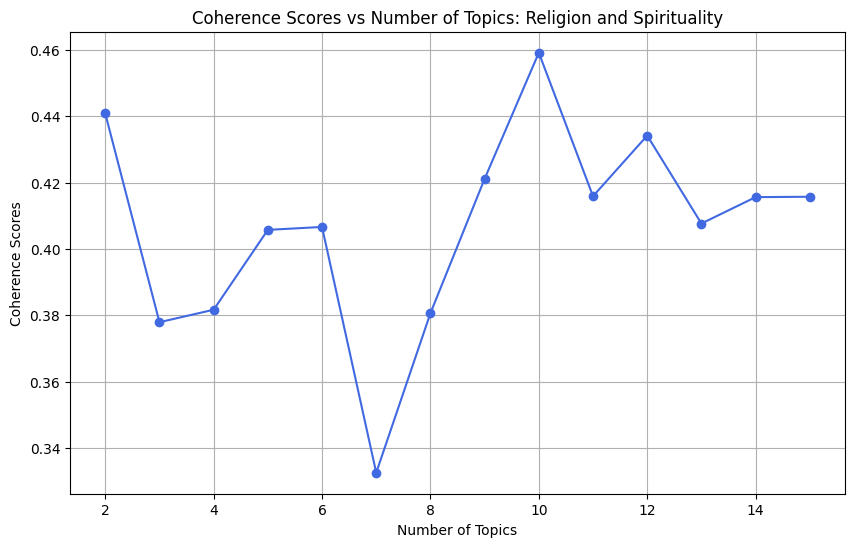

In [11]:
df_coherence = pd.read_csv("./coherence/coherence_religion_AND_spirituality.csv")

# Extracting data from the DataFrame
num_topics = df_coherence['Number of Topics']
coherence_scores = df_coherence['Coherence Scores']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_topics, coherence_scores, marker='o', linestyle='-', color='royalblue')
plt.title('Coherence Scores vs Number of Topics: Religion and Spirituality')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.grid(True)


output_folder = os.path.join('coherence', 'coherence_png')
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, 'coherence_religion_AND_spirituality.png')
plt.savefig(output_path)

plt.show()

In [10]:
html_dir = 'visualizations'
os.makedirs(html_dir, exist_ok=True)

for num_topics in range(2, 16):
    model_file = f'models/lda_religion_AND_spirituality_{num_topics}_topics'
    lda_model_mallet = LdaMallet.load(model_file)
    
    # convert Mallet LDA model to Gensim LDA model
    lda_model_gensim = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_model_mallet)
    vis_data = gensimvis.prepare(lda_model_gensim, doc_term_matrix, dictionary)
    
    # save to HTML
    html_filename = os.path.join(html_dir, f'lda_religion_AND_spirituality_{num_topics}_topics.html')
    pyLDAvis.save_html(vis_data, html_filename)

/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builti